In [34]:

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests
import numpy as np


res = requests.get("https://fbref.com/en/comps/9/3232/stats/2019-2020-Premier-League-Stats.html")
#next two lines take care of the breaks in the table
comm = re.compile("<!--|-->")
soup = BeautifulSoup(comm.sub("",res.text),'lxml')
all_tables = soup.findAll("tbody")
team_table = all_tables[0]
player_table = all_tables[2]

#Player Stats
pre_df_player = dict()
features_wanted_player = {"player","position","squad","age","games","games_starts","games_subs","minutes","minutes_per_game","goals","assists","pens_made","pens_att","fouls","cards_yellow","cards_red","shots_on_target","goals_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","shots_on_target_per90","fouls_per90","cards_per90"}
rows_player = player_table.find_all('tr')
for row in rows_player:
    if(row.find('th',{"scope":"row"}) != None):
        for f in features_wanted_player:
            cell = row.find("td",{"data-stat": f})
            
            if cell != None:
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
        df_player = pd.DataFrame.from_dict(pre_df_player)


df_player['year'] = 2019

df_player = df_player[["year","player","squad","position","age","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90"]]
#display(df_player)

In [6]:
df_player.squad.unique()

array(['Crystal Palace', 'Norwich City', 'Chelsea', 'Southampton',
       'Liverpool', 'Manchester City', 'West Ham', 'Bournemouth',
       'Leicester City', 'Tottenham', 'Newcastle Utd', 'Brighton',
       'Arsenal', 'Manchester Utd', 'Everton', 'Sheffield Utd', 'Burnley',
       'Aston Villa', 'Wolves', 'Watford'], dtype=object)

In [35]:
df_player['position'] = df_player['position'].str[:2]

PositionFull = {'DF' : 'Defender', 'FW' : 'Forward', 'MF' : 'MidFielder',
           'GK' : 'GoalKeeper'}
df_player['PositionFull'] = df_player['position'].map(PositionFull)

In [37]:
df_playerManU = df_player.loc[df_player['squad'] == 'Manchester Utd']
df_playerManU.head(50)


,year,player,squad,position,age,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,PositionFull
29,2019,Eric Bailly,Manchester Utd,DF,25,4,1,150,0,0,0,0,0,0,0.00,0.00,0.00,0.00,Defender
82,2019,Tahith Chong,Manchester Utd,FW,19,3,0,37,0,0,0,0,0,0,0.00,0.00,0.00,0.00,Forward
96,2019,Diogo Dalot,Manchester Utd,DF,20,4,1,67,0,0,0,0,0,0,0.00,0.00,0.00,0.00,Defender
137,2019,Bruno Fernandes,Manchester Utd,MF,24,14,14,"1,186",8,7,4,4,2,0,0.61,1.14,0.30,0.83,MidFielder
146,2019,Timothy Fosu-Mensah,Manchester Utd,DF,21,3,2,136,0,0,0,0,1,0,0.00,0.00,0.00,0.00,Defender
151,2019,Fred,Manchester Utd,MF,26,29,23,"2,163",0,0,0,0,8,0,0.00,0.00,0.00,0.00,MidFielder
157,2019,James Garner,Manchester Utd,MF,18,1,0,9,0,0,0,0,0,0,0.00,0.00,0.00,0.00,MidFielder
161,2019,David de Gea,Manchester Utd,GK,28,38,38,"3,420",0,0,0,0,2,0,0.00,0.00,0.00,0.00,GoalKeeper
168,2019,Angel Gomes,Manchester Utd,MF,18,2,0,21,0,0,0,0,0,0,0.00,0.00,0.00,0.00,MidFielder
175,2019,Mason Greenwood,Manchester Utd,FW,17,31,12,"1,320",10,1,0,0,0,0,0.68,0.75,0.68,0.75,Forward


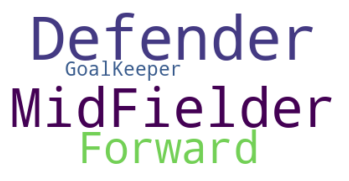

In [65]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Start with one type:
text = " ".join(positiontype for positiontype in df_playerManU.PositionFull)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

df_playerManU.to_csv('ManchesterUnitedRoster2019.csv')